In [1]:
%matplotlib inline
import os
import numpy as np
import torch
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.utils.data import TensorDataset, DataLoader
import kcu as utils


cwdir = os.getcwd()
trainfile = cwdir + "/../../data/MNIST/train.csv"
# train_data = np.loadtxt(trainfile, skiprows=1, delimiter=",")
if not(os.path.exists( cwdir + "/../../data/MNIST/train.bin.npy")):
    train_data = np.loadtxt(trainfile, skiprows=1, delimiter=",").astype(np.int16)
    np.save(cwdir + "/../../data/MNIST/train.bin", train_data)
else:
    train_data = np.load(cwdir + "/../../data/MNIST/train.bin.npy")


train_Y = train_data[:, 0]
train_X = train_data[:, 1:]

# Split train set into train and validation
train_inds, val_inds = sklearn.model_selection.train_test_split(
    np.arange(len(train_Y)), test_size=0.2
)
train_X, val_X = train_X[train_inds], train_X[val_inds]
train_Y, val_Y = train_Y[train_inds], train_Y[val_inds]

kNN Acc: 0.9660714285714286


Test Error: 
 Accuracy: 97.2%, Avg loss: 0.012299 



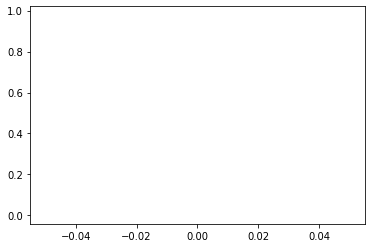

Test Error: 
 Accuracy: 97.6%, Avg loss: 0.009987 



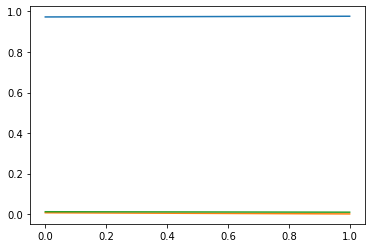

Test Error: 
 Accuracy: 98.2%, Avg loss: 0.008223 



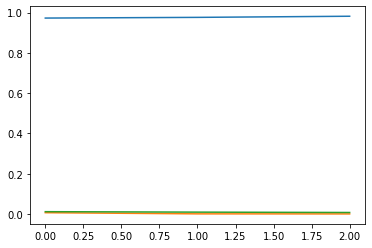

In [2]:

# Lets start with k-Nearest Neighbour:
clf = KNeighborsClassifier(5)
clf.fit(train_X, train_Y)
pred = clf.predict(val_X)
print("kNN Acc:", sklearn.metrics.accuracy_score(val_Y, pred))

# Lets try Pytorch
train_dataset = utils.dataset.MNISTDataset(train_X, train_Y)
val_dataset = utils.dataset.MNISTDataset(val_X, val_Y)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

device = torch.device("cuda")
cnn = utils.models.MNIST_CNN_01().to(device)
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)

# Now train:
utils.boilerplates.train_classifier(
    cnn, optimizer, train_loader, device, 3, nn.CrossEntropyLoss(), val_loader, show_plot=True
)
